!pip install comet_ml

In [242]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="TFeUn29BbDYHxZnuv9Uy9X3R0",
    project_name="Climate_change_challenge-2022",
    workspace="keltings",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/keltings/climate-change-challenge-2022/7cc6b7069304473c8d6c2ea8b95c99f6
COMET INFO:   Parameters:
COMET INFO:     C                            : 2
COMET INFO:     alpha                        : 1.0
COMET INFO:     analyzer                     : word
COMET INFO:     average                      : False
COMET INFO:     binarize                     : 0.0
COMET INFO:     binary                       : False
COMET INFO:     class_prior                  : 1
COMET INFO:     class_weight                 : 1
COMET INFO:     cv                           : 10
COMET INFO:     decode_error                 : strict
COMET INFO:     dtype                        : <class 'numpy.int64'>
COMET INFO:     dual                         : False
COMET INFO:     early_stop

! pip install wordcloud

###### Import Necessary Dependencies

In [243]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

###### Read and load the dataset

In [244]:
df = pd.read_csv('data/train.csv')
dft = pd.read_csv('data/test_with_no_labels.csv')
dft

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


###### Exploratory Data Analysis 

Five top records of data

In [245]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


###### Columns/features in data

In [246]:
df.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

###### Length of the dataset

In [247]:
print('length of data is', len(df))

length of data is 15819


###### Shape of data

In [248]:
df.shape

(15819, 3)

###### Data information

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


###### Checking for Null values

In [250]:
np.sum(df.isnull().any(axis=1))

0

###### Rows and columns in the dataset

In [251]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   15819


###### Check unique Target Values

In [252]:
df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

###### Check the number of target values

In [253]:
df['sentiment'].nunique()

4

##### Data Visualization of Target Variables

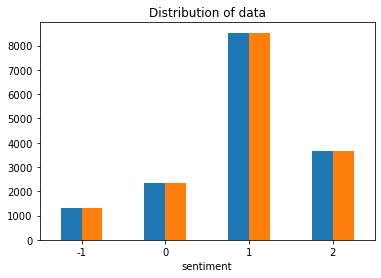

In [254]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels([-1,0,1,2], rotation=0)
# Storing data in lists.
message, sentiment = list(df['message']), list(df['sentiment'])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

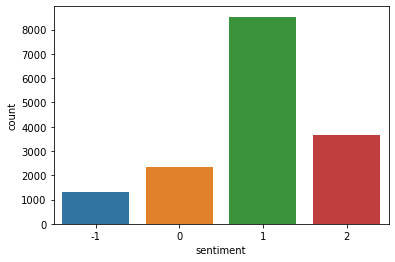

In [255]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

##### Data Preprocessing 

In the above-given problem statement before training the model, we performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) for better results.

###### Selecting the message and Target column for our further analysis

In [256]:
data=df[['message','sentiment']]

###### Separating sentiments

In [257]:
# segregating dataframe for analyzing individual sentiments
news=data[(data['sentiment']==2)]
neutral=data[(data['sentiment']==0)]
pro=data[(data['sentiment']==1)]
anti=data[(data['sentiment']==-1)]


###### Combining the different tweets

In [258]:
dataset = pd.concat([news, neutral, pro, anti])

###### Making statement message in lower case

In [259]:
dataset['message']=dataset['message'].str.lower()
#dataset['message'].tail()
dft['message']=dft['message'].str.lower()

###### Defining set containing all stopwords in English.

In [260]:
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')

###### Cleaning and removing the above stop words list from the tweet text

In [261]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(message):
    return " ".join([word for word in str(message).split() if word not in STOPWORDS])
df['message_clean'] = dataset['message'].apply(lambda message: cleaning_stopwords(message))
#df['message_clean'].head()
dft['message_clean'] = dft['message'].apply(lambda message: cleaning_stopwords(message))
dft

,message,tweetid,message_clean
0,europe will now be looking to china to make su...,169760,europe looking china make sure alone fighting ...
1,combine this with the polling of staffers re c...,35326,combine polling staffers climate change womens...
2,"the scary, unimpeachable evidence that climate...",224985,"scary, unimpeachable evidence climate change a..."
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,@karoli @morgfair @osborneink @dailykos putin ...
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt @fakewillmoore: 'female orgasms cause globa...
...,...,...,...
10541,"rt @brittanybohrer: brb, writing a poem about ...",895714,"rt @brittanybohrer: brb, writing poem climate ..."
10542,2016: the year climate change came home: durin...,875167,2016: year climate change came home: hottest y...
10543,rt @loop_vanuatu: pacific countries positive a...,78329,rt @loop_vanuatu: pacific countries positive f...
10544,"rt @xanria_00018: you’re so hot, you must be t...",867455,"rt @xanria_00018: you’re hot, must cause globa..."


###### Cleaning and removing punctuations

In [262]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(message):
    translator = str.maketrans('', '', punctuations_list)
    return message.translate(translator)
df['message_clean']= df['message_clean'].apply(lambda x: cleaning_punctuations(x))
#df['message_clean'].tail()
dft['message_clean']= dft['message_clean'].apply(lambda x: cleaning_punctuations(x))
dft

,message,tweetid,message_clean
0,europe will now be looking to china to make su...,169760,europe looking china make sure alone fighting ...
1,combine this with the polling of staffers re c...,35326,combine polling staffers climate change womens...
2,"the scary, unimpeachable evidence that climate...",224985,scary unimpeachable evidence climate change al...
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos putin got ...
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...
...,...,...,...
10541,"rt @brittanybohrer: brb, writing a poem about ...",895714,rt brittanybohrer brb writing poem climate cha...
10542,2016: the year climate change came home: durin...,875167,2016 year climate change came home hottest yea...
10543,rt @loop_vanuatu: pacific countries positive a...,78329,rt loopvanuatu pacific countries positive fiji...
10544,"rt @xanria_00018: you’re so hot, you must be t...",867455,rt xanria00018 you’re hot must cause global wa...


###### Cleaning and removing repeating characters

In [263]:
def cleaning_repeating_char(message):
    return re.sub(r'(.)1+', r'1', message)
df['message_clean'] = df['message_clean'].apply(lambda x: cleaning_repeating_char(x))
#df['message_clean'].tail()
dft['message_clean'] = dft['message_clean'].apply(lambda x: cleaning_repeating_char(x))

###### Cleaning and removing URL’s

In [264]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['message_clean'] = df['message_clean'].apply(lambda x: cleaning_URLs(x))
#df['message_clean'].tail()
dft['message_clean'] = dft['message_clean'].apply(lambda x: cleaning_URLs(x))

###### Cleaning and removing Numeric numbers

In [265]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['message_clean'] = df['message_clean'].apply(lambda x: cleaning_numbers(x))
#df['message_clean'].tail()
dft['message_clean'] = dft['message_clean'].apply(lambda x: cleaning_numbers(x))

###### Getting tokenization of tweet text

In [266]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
df['message_clean'] = df['message_clean'].apply(tokenizer.tokenize)
#df['message_clean'].tail()
dft['message_clean'] = dft['message_clean'].apply(tokenizer.tokenize)

###### Applying Stemming

In [267]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    message_stemmed = [st.stem(word) for word in data]
    return data
df['message_clean']= df['message_clean'].apply(lambda x: stemming_on_text(x))
#df['message_clean'].head()
dft['message_clean']= dft['message_clean'].apply(lambda x: stemming_on_text(x))

###### Applying Lemmatizer

In [268]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    messege_lemmatized = [lm.lemmatize(word) for word in data]
    return ' '.join(messege_lemmatized)
df['message_clean'] = df['message_clean'].apply(lambda x:lemmatizer_on_text(x))
#df['message_clean'].head()
dft['message_clean'] = dft['message_clean'].apply(lambda x:lemmatizer_on_text(x))

In [269]:
dft

,message,tweetid,message_clean
0,europe will now be looking to china to make su...,169760,europe looking china make sure alone fighting ...
1,combine this with the polling of staffers re c...,35326,combine polling staffer climate change woman r...
2,"the scary, unimpeachable evidence that climate...",224985,scary unimpeachable evidence climate change al...
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos putin got ...
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasm cause global wa...
...,...,...,...
10541,"rt @brittanybohrer: brb, writing a poem about ...",895714,rt brittanybohrer brb writing poem climate cha...
10542,2016: the year climate change came home: durin...,875167,year climate change came home hottest year rec...
10543,rt @loop_vanuatu: pacific countries positive a...,78329,rt loopvanuatu pacific country positive fiji l...
10544,"rt @xanria_00018: you’re so hot, you must be t...",867455,rt xanria you ’ re hot must cause global warmi...


###### Separating input feature and label

In [270]:
X=df.message_clean

y=dataset.sentiment

In [271]:
X_tfeat = dft['message_clean']

###### Plot a cloud of words for news, pro, neutral and anti tweets

news = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(news))
plt.imshow(wc)

pro = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pro))
plt.imshow(wc)

neutral = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neutral))
plt.imshow(wc)

anti = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(anti))
plt.imshow(wc)

###### Bag of Words

Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

###### Scikit-Learn provides a neat way of performing the bag of words technique using CountVectorizer.

Now, we will convert the text data into vectors, by fitting and transforming the corpus that we have created.

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(df['message_clean'])
#X_tR =dft.message_clean
#X = df.message_clean
#y = df.sentiment
traindata.shape

(15819, 129351)

In [291]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(traindata)
X_train_tfidf.shape

(15819, 129351)

In [292]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, df.sentiment)

In [293]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),                     
                    ('clf', MultinomialNB()), ])
text_clf = text_clf.fit(df.message_clean, df.sentiment)

In [296]:
import numpy as np
#message = df(subset='message_clean', shuffle=True)
predicted = text_clf.predict(df.message_clean)
np.mean(predicted == df.sentiment)

0.6935963082369303

In [305]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42)),
])
_ = text_clf_svm.fit(df.message_clean, df.sentiment)
predicted_svm = _.predict(df.message_clean)
np.mean(predicted_svm == df.sentiment)

0.6202035526898034

In [299]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}

In [307]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(df.message_clean, df.sentiment)
predicted_gs_clf = gs_clf.predict(df.message_clean)
np.mean(predicted_gs_clf == df.sentiment)

0.9959542322523548

In [301]:
gs_clf.best_score_
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [309]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf-svm__alpha': (1e-2, 1e-3),}
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(df.message_clean, df.sentiment)
gs_clf_svm.best_score_
gs_clf_svm.best_params_
predicted_gs_clf_svm = gs_clf_svm.predict(df.message_clean)
np.mean(predicted_gs_clf_svm == df.sentiment)

0.635501611985587

###### Splitting our data into Train and Test Subset

In [276]:
# Separating the 80% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =0)

###### Transforming Dataset using TF-IDF Vectorizer
 Fit the TF-IDF Vectorizer

In [277]:
vectoriser = TfidfVectorizer(stop_words='english', max_df=0.8)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  26056


C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [278]:
#Transform the data using TF-IDF Vectorizer

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_tR = vectoriser.transform(X_tR)

##### Function For Model Evaluation

After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

Accuracy Score
Confusion Matrix with Plot
ROC-AUC Curve

In [279]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and  Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    

##### Model Building

In the problem statement we have used three different models respectively :

Bernoulli Naive Bayes
SVM (Support Vector Machine)
Logistic Regression
The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models and then try to find out the one which gives the best performance among them.

In [280]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train, y_train)
model_Evaluate(pass_tf)
pred_pac_bigrams = pass_tf.predict(X_tR)

              precision    recall  f1-score   support

          -1       0.64      0.47      0.54       249
           0       0.53      0.43      0.47       473
           1       0.77      0.82      0.79      1701
           2       0.72      0.74      0.73       741

    accuracy                           0.72      3164
   macro avg       0.66      0.62      0.64      3164
weighted avg       0.71      0.72      0.71      3164



###### BernoulliB

In [281]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       249
           0       0.89      0.07      0.13       473
           1       0.60      0.98      0.74      1701
           2       0.86      0.40      0.54       741

    accuracy                           0.63      3164
   macro avg       0.59      0.36      0.35      3164
weighted avg       0.66      0.63      0.55      3164



C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [282]:
#unseen data 
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_tR)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       249
           0       0.89      0.07      0.13       473
           1       0.60      0.98      0.74      1701
           2       0.86      0.40      0.54       741

    accuracy                           0.63      3164
   macro avg       0.59      0.36      0.35      3164
weighted avg       0.66      0.63      0.55      3164



C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Plot the ROC-AUC Curve for model-1

In [283]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

          -1       0.75      0.45      0.57       249
           0       0.60      0.41      0.49       473
           1       0.77      0.87      0.82      1701
           2       0.72      0.75      0.73       741

    accuracy                           0.74      3164
   macro avg       0.71      0.62      0.65      3164
weighted avg       0.73      0.74      0.73      3164



In [284]:
#unseen data
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_tR)


              precision    recall  f1-score   support

          -1       0.75      0.45      0.57       249
           0       0.60      0.41      0.49       473
           1       0.77      0.87      0.82      1701
           2       0.72      0.75      0.73       741

    accuracy                           0.74      3164
   macro avg       0.71      0.62      0.65      3164
weighted avg       0.73      0.74      0.73      3164



In [285]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_svc = dft[['tweetid']]
kaggle_svc['sentiment']= y_pred2
kaggle_svc.to_csv('sentiment_svc.csv', index = None)

C:\Users\kelida\AppData\Local\Temp/ipykernel_8504/4065103568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_svc['sentiment']= y_pred2


In [286]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

          -1       0.78      0.39      0.52       249
           0       0.64      0.38      0.47       473
           1       0.74      0.89      0.81      1701
           2       0.73      0.71      0.72       741

    accuracy                           0.73      3164
   macro avg       0.72      0.59      0.63      3164
weighted avg       0.73      0.73      0.72      3164



In [287]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_tR)


              precision    recall  f1-score   support

          -1       0.78      0.39      0.52       249
           0       0.64      0.38      0.47       473
           1       0.74      0.89      0.81      1701
           2       0.73      0.71      0.72       741

    accuracy                           0.73      3164
   macro avg       0.72      0.59      0.63      3164
weighted avg       0.73      0.73      0.72      3164



#The following codes are used to save the expected predictions for kaggle submission
kaggle_LR = dft[['tweetid']]
kaggle_LR['sentiment']= y_pred3
kaggle_LR.to_csv('sentiment_LR.csv', index = None)

######  Random Forest Classifier, and we will tune the hyperparameters using GridSearchCV.

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [288]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [289]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/keltings/climate-change-challenge-2022/f19a416167374429b8a9793cbb61c016
COMET INFO:   Parameters:
COMET INFO:     C                   : 2
COMET INFO:     alpha               : 1.0
COMET INFO:     analyzer            : word
COMET INFO:     average             : False
COMET INFO:     binarize            : 0.0
COMET INFO:     binary              : False
COMET INFO:     class_prior         : 1
COMET INFO:     class_weight        : 1
COMET INFO:     decode_error        : strict
COMET INFO:     dtype               : <class 'numpy.float64'>
COMET INFO:     dual                : False
COMET INFO:     early_stopping      : False
COMET INFO:     encoding            : utf-8
COMET INFO:     fit_intercept       : True
COMET INFO:     fit_prior           : True